**Problem Statement**

The objective is to analyze credit card customer data to understand their behavior and usage patterns. By identifying key factors that influence customer attrition, we aim to build a predictive model to classify customers at risk of leaving. This insight will help the bank create targeted strategies to improve customer retention and satisfaction.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("BankChurners.csv")

In [3]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
df.shape

(10127, 23)

In [5]:
df.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [6]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10122    False
10123    False
10124    False
10125    False
10126    False
Length: 10127, dtype: bool

In [7]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [8]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [9]:
df = df.drop(['CLIENTNUM', 
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [10]:
df = df[df['Education_Level'] != 'Unknown']

In [11]:
df["Education_Level"].unique()

array(['High School', 'Graduate', 'Uneducated', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [12]:
df = df[df['Marital_Status'] != 'Unknown']

In [13]:
df['Marital_Status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [14]:
df = df[df['Income_Category'] != 'Unknown']

In [15]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +'], dtype=object)

In [16]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<Axes: xlabel='Total_Trans_Amt'>

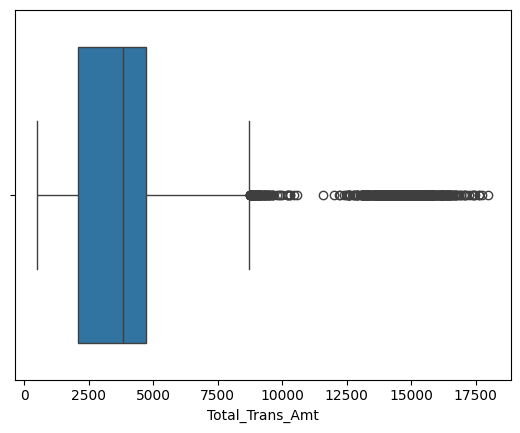

In [17]:
sns.boxplot(x="Total_Trans_Amt", data=df)

<Axes: xlabel='Credit_Limit'>

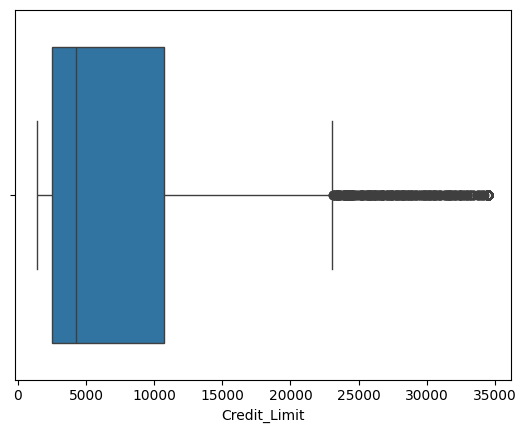

In [18]:
sns.boxplot(x="Credit_Limit", data=df)

In [19]:
df = df[df["Total_Trans_Amt"] < df["Total_Trans_Amt"].quantile(0.99)]
df= df[df["Credit_Limit"] < df["Credit_Limit"].quantile(0.99)]

In [20]:
df.shape

(6645, 20)

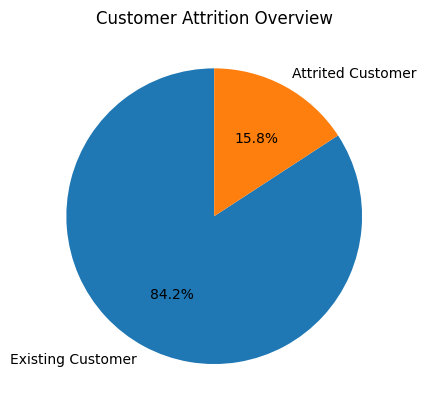

In [21]:
attrition_counts = df['Attrition_Flag'].value_counts()
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Customer Attrition Overview")
plt.show()

**Observation**

This pie chart indicates that the majority of customers are existing customers, while only a smaller portion have attrited. This suggests that most customers are retained, but it is still important to understand the reasons behind attrition to further reduce customer loss.

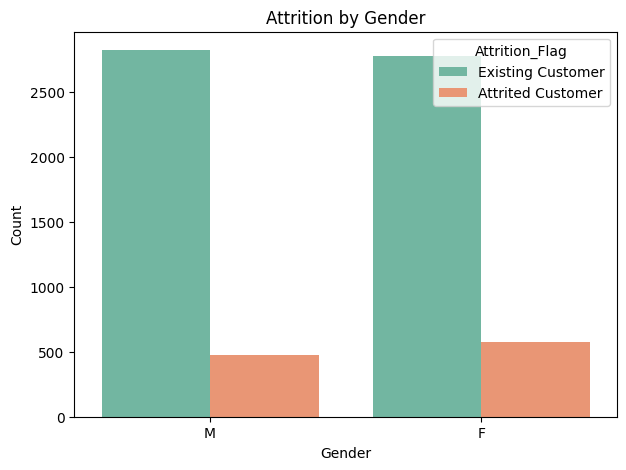

In [22]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Gender', hue='Attrition_Flag', palette='Set2')
plt.title("Attrition by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

**Observation**

The gender distribution shows that the number of male and female customers is almost equal, with males slightly higher. However, the attrition rate is noticeably higher among female customers, indicating they are more likely to discontinue their credit card services.

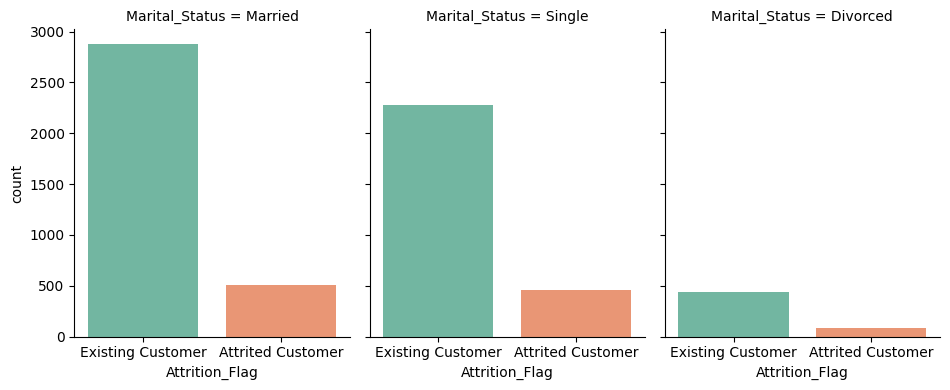

In [23]:
sns.catplot(x="Attrition_Flag", col="Marital_Status", data=df, kind="count", palette="Set2",height=4, aspect=0.8)
plt.show()

**Observation**

Married customers tend to spend more on their credit cards compared to single and divorced individuals. However, the attrition rate among married customers is slightly higher than that of single customers. This suggests that while married individuals are valuable in terms of spending, they may still be at risk of leaving the service.

Text(0, 0.5, 'Count')

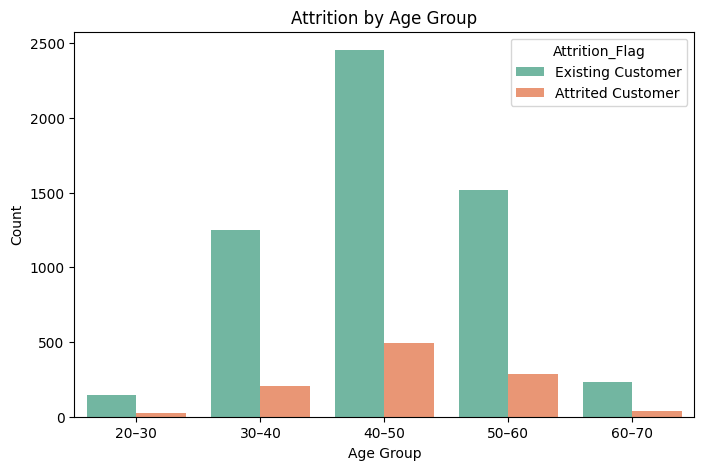

In [24]:
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=[20, 30, 40, 50, 60, 70], labels=['20–30', '30–40', '40–50', '50–60', '60–70'])

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Age_Group', hue='Attrition_Flag',palette='Set2')
plt.title("Attrition by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")

**Observation**

The above graph shows that customers aged between 40 to 50 years have the highest credit card spending, and their attrition rate is also higher compared to other age groups. This is followed by the 50 to 60 age group, which ranks second in both spending and attrition. These patterns indicate that middle-aged customers are financially active but also more likely to discontinue their credit card usage.

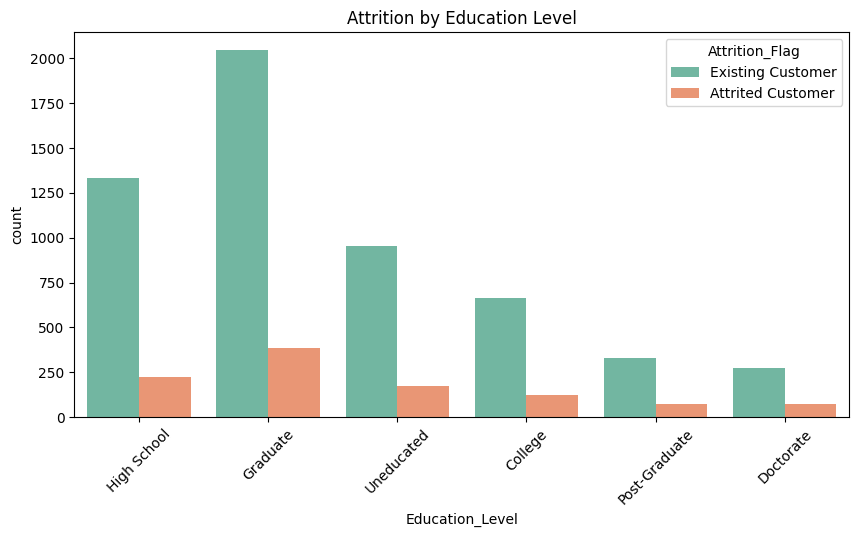

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Education_Level', hue='Attrition_Flag',palette="Set2")
plt.title("Attrition by Education Level")
plt.xticks(rotation=45)
plt.show()

**Obervation**

The graph shows that graduate customers have the highest credit card spending, followed by those with a high school education and the uneducated group. Additionally, the attrition count is also highest among graduate customers, suggesting that even well-educated individuals with high spending habits may still choose to leave the service.
  

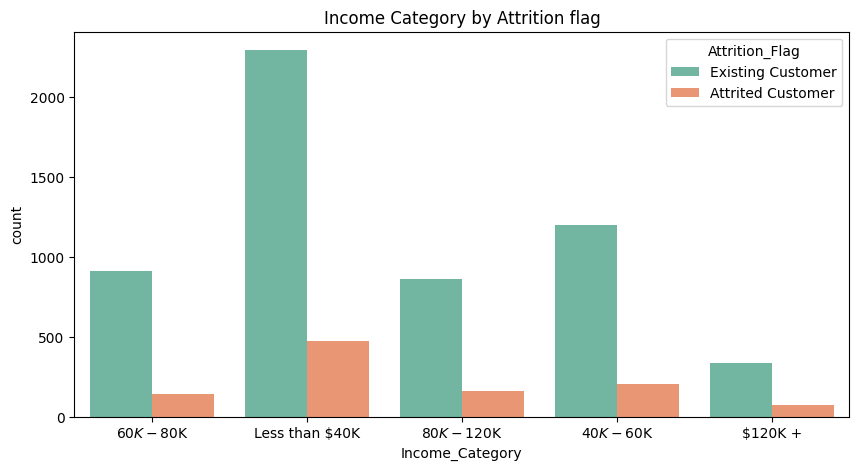

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x="Income_Category", hue='Attrition_Flag',data=df, palette="Set2")
plt.title("Income Category by Attrition flag")
plt.show()

**Observation**
  
The graph shows that customers with an income of less than $40K use credit cards the most

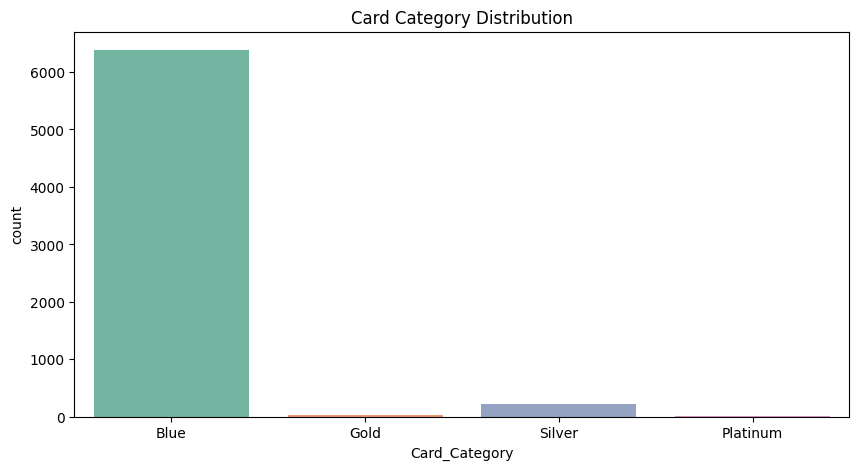

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='Card_Category', data=df, palette="Set2")
plt.title("Card Category Distribution")
plt.show()

**Observation**

Most customers use the Blue card, followed by the Silver card. This indicates that the Blue card is the most preferred among users, possibly due to its basic features or accessibility.

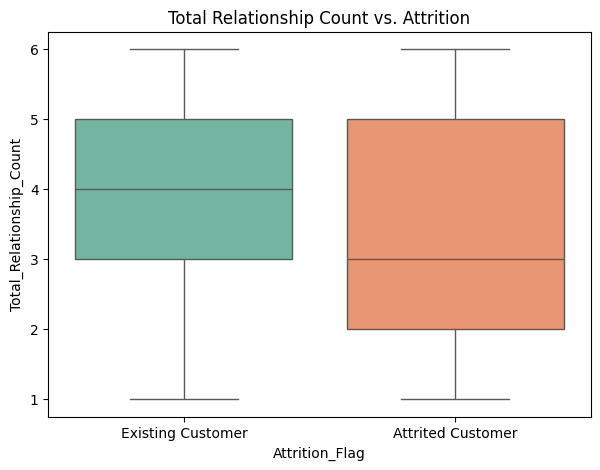

In [28]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='Attrition_Flag', y='Total_Relationship_Count', palette='Set2')
plt.title("Total Relationship Count vs. Attrition")
plt.show()

**Observation**

The total relationship count is higher among existing customers, while attrited customers tend to have a lower relationship count. This suggests that customers with stronger engagement and more products or services are more likely to stay.

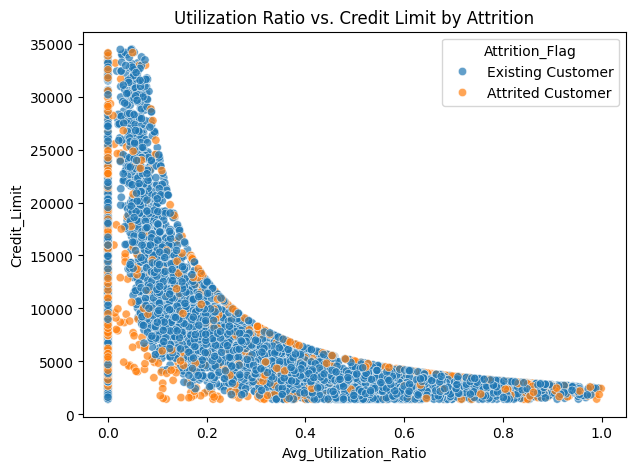

In [29]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Avg_Utilization_Ratio', y='Credit_Limit', hue='Attrition_Flag', alpha=0.7)
plt.title("Utilization Ratio vs. Credit Limit by Attrition")
plt.show()

**Obserrvation**

Most existing customers have low utilization ratios and higher credit limits. Attrited customers are more common among those with high utilization and low credit limits, indicating higher risk of attrition in that group.

**Conclusion**

Most customers are retained, but attrition is higher among males, married individuals, and the 40–50 age group. Higher spending is seen in graduates and lower-income customers, yet their attrition is also high. Customers with high credit usage and low limits are more likely to leave, while strong relationships help retain them.

In [30]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse_output=False)

encoded_data=encoder.fit_transform(df[['Marital_Status', 'Income_Category', 'Card_Category']])

df2=pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Marital_Status', 'Income_Category', 'Card_Category']))

result=pd.concat([df,df2], axis=1)
result

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,Existing Customer,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Existing Customer,49.0,F,5.0,Graduate,Single,Less than $40K,Blue,44.0,6.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,Existing Customer,51.0,M,3.0,Graduate,Married,$80K - $120K,Blue,36.0,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,Existing Customer,40.0,M,3.0,Uneducated,Married,$60K - $80K,Blue,21.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,Existing Customer,44.0,M,2.0,Graduate,Married,$40K - $60K,Blue,36.0,3.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Attrition_Flag'] = label_encoder.fit_transform(df['Attrition_Flag'])

df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Group
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,40–50
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40–50
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,50–60
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,30–40
5,1,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,...,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,40–50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,1,54,M,1,High School,Single,$60K - $80K,Blue,34,5,...,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151,50–60
10121,1,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,...,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164,50–60
10122,1,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,40–50
10124,0,44,F,1,High School,Married,Less than $40K,Blue,36,5,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,40–50


In [32]:
result = pd.get_dummies(df,dtype=int,drop_first=True)
result

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Age_Group_30–40,Age_Group_40–50,Age_Group_50–60,Age_Group_60–70
0,1,45,3,39,5,1,3,12691.0,777,11914.0,...,1,0,0,0,0,0,0,1,0,0
1,1,49,5,44,6,1,2,8256.0,864,7392.0,...,0,0,1,0,0,0,0,1,0,0
2,1,51,3,36,4,1,0,3418.0,0,3418.0,...,0,1,0,0,0,0,0,0,1,0
4,1,40,3,21,5,1,0,4716.0,0,4716.0,...,1,0,0,0,0,0,1,0,0,0
5,1,44,2,36,3,1,2,4010.0,1247,2763.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,1,54,1,34,5,2,0,13940.0,2109,11831.0,...,1,0,0,0,0,0,0,0,1,0
10121,1,56,1,50,4,1,4,3688.0,606,3082.0,...,0,0,1,0,0,0,0,0,1,0
10122,1,50,2,40,3,2,3,4003.0,1851,2152.0,...,0,0,0,0,0,0,0,1,0,0
10124,0,44,1,36,5,3,4,5409.0,0,5409.0,...,0,0,1,0,0,0,0,1,0,0


In [33]:
X = result.drop('Attrition_Flag', axis=1)
Y = result['Attrition_Flag']

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [36]:
from sklearn.metrics import accuracy_score

# Making predictions
y_pred = model.predict(x_test)

# Checking accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8924003009781791
